# Assumptions (potiential problems)
 - ath_name == '' means race cancelled (checked for a few of events)
   - correct, afaik
 - ['season', 'venue', 'event', 'date', 'gender'] identify uniquely a race
     - we do not get the same number of races as https://en.wikipedia.org/wiki/FIS_Alpine_Ski_World_Cup
 - ['season', 'event', 'date', 'gender', 'ath_name'] is a unique index for the data frames

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
def parseCSV(isMale=True):
    gender = 'm' if isMale else 'f'
    df = pd.read_csv(f'../data/wc{gender}.csv')
    df = df.replace(np.nan, '', regex=True)
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
    df['gender'] = gender
    return df

In [6]:
def remove_cancelled_race(df):
    return df[df['ath_name']!='']

In [28]:
def number_season(df):
    return len(df['season'].unique())

def number_races(df):
    return len(df[['season', 'venue', 'event','date', 'gender']].drop_duplicates())

def number_athletes(df):
    return len(df['ath_name'].unique())

def number_country(df):
    return len(df['ath_country'].unique())

def number_races_events(df):
    return df[['season', 'venue', 'event','date','gender']].drop_duplicates()[['venue', 'event']].groupby('event').count()

def number_races_years(df):
    return df[['season', 'venue', 'event', 'date', 'gender']].drop_duplicates()[['event','season']].groupby('season').count()
    

In [9]:
def show_basic_stats(df):
    print('# seasons  :', number_season(df))
    print('# races    :', number_races(df))
    print('# athletes :', number_athletes(df))
    print('# country  :', number_country(df))
    print(number_races_events(df))

In [10]:
dfm = remove_cancelled_race(parseCSV())
dff = remove_cancelled_race(parseCSV(False))
both = pd.concat([dfm, dff])
print('-----  World Cup Men -----')
show_basic_stats(dfm)

print('-----  World Cup Women -----')
show_basic_stats(dff)

print('-----  World Cup Women -----')
show_basic_stats(both)

-----  World Cup Men -----
# seasons  : 54
# races    : 1798
# athletes : 1730
# country  : 69
              venue
event              
Combined        134
Downhill        496
Giant Slalom    423
Parallel         24
Slalom          504
Super G         217
-----  World Cup Women -----
# seasons  : 54
# races    : 1680
# athletes : 1407
# country  : 57
              venue
event              
Combined        106
Downhill        417
Giant Slalom    418
Parallel         23
Slalom          478
Super G         238
-----  World Cup Women -----
# seasons  : 54
# races    : 3478
# athletes : 3137
# country  : 77
              venue
event              
Combined        240
Downhill        913
Giant Slalom    841
Parallel         47
Slalom          982
Super G         455


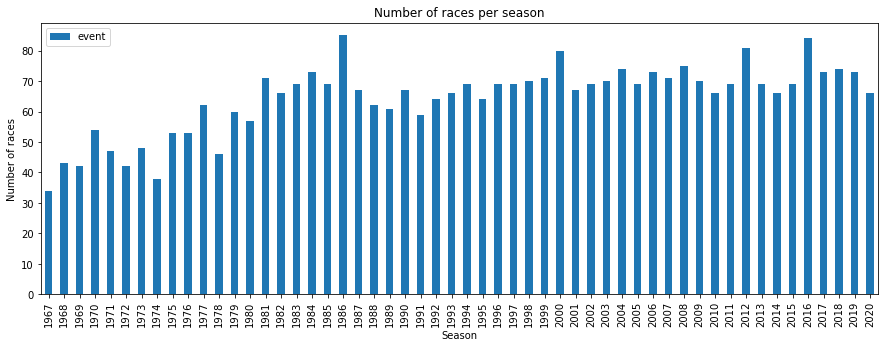

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
axes = number_races_years(both).plot.bar(ax=axes, title='Number of races per season')
axes.set_xlabel("Season")
axes.set_ylabel("Number of races")
fig.savefig('races_per_year.png')

## Corrections

Attention: after parsing, WCM has 2 Kitzbüehl Downhill races on the 1995-01-14. One of them was on the 1995-01-13. Corrected manually **only in the CSV** file.

In [25]:
dfm_indexed = dfm.set_index(['season', 'date', 'venue', 'country', 'event', 'ath_name'])
dfm_indexed.index.is_unique#.value_counts().head(30)

True

In [26]:
dff_indexed = dff.set_index(['season', 'date', 'venue', 'country', 'event', 'ath_name'])
dff_indexed.index.is_unique#.value_counts().head(30)

True